In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth", 200)
sns.set(style="whitegrid")

In [2]:
isot = pd.read_csv("ISOT.csv")
welfake = pd.read_csv("WELFake_dataset.csv")

print("ISOT shape:", isot.shape)
print("WELFake shape:", welfake.shape)

display(isot.head())
display(welfake.head())


ISOT shape: (44898, 5)
WELFake shape: (72134, 4)


,title,text,subject,date,label
0,"BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. Testimony","Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all o...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious Mocking Eulogies (VIDEO),"Now that Donald Trump is the presumptive GOP nominee, it s time to remember all those other candidates who tried so hard to beat him in the race to the White House. After all, how can we forget al...",News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY Trolling Him For Being A Homophobic Bigot,"Mike Pence is a huge homophobe. He supports ex-gay conversion therapy, opposes hate crimes protections for LGBTQ people, is staunchly against marriage equality, and once said that he believes that...",News,"December 3, 2016",0
3,California AG pledges to defend birth control insurance coverage,SAN FRANCISCO (Reuters) - California Attorney General Xavier Becerra said on Friday he was “prepared to take whatever action it takes” to defend the Obamacare mandate that health insurers provide ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy Nancy Pelosi’s Claim About Trump Being “Weak” For Wanting Border Wall [VIDEO],Twisted reasoning is all that comes from Pelosi these days especially when in 2006 most prominent Democrats voted to build a barrier at the border.Fred Davis and John Ladd are two Arizona ranchers...,politics,"Apr 25, 2017",0


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO],No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others o...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO],"Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Er...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid",A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled f...,0
4,4,SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice,"The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly ag...",1


In [3]:
print("ISOT columns:")
print(isot.columns)

print("\nWELFake columns:")
print(welfake.columns)

isot.info()
welfake.info()

ISOT columns:
Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

WELFake columns:
Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [4]:
def standardize(df, dataset_name):
    df = df.copy()
    df = df.rename(columns={
        "content": "text",
        "article": "text"
    })
    df["title"] = df["title"].fillna("")
    df["text"] = df["text"].fillna("")
    df["dataset"] = dataset_name
    return df[["title", "text", "label", "dataset"]]

isot = standardize(isot, "ISOT")
welfake = standardize(welfake, "WELFake")

display(isot.head())
display(welfake.head())

,title,text,label,dataset
0,"BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. Testimony","Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all o...",0,ISOT
1,Failed GOP Candidates Remembered In Hilarious Mocking Eulogies (VIDEO),"Now that Donald Trump is the presumptive GOP nominee, it s time to remember all those other candidates who tried so hard to beat him in the race to the White House. After all, how can we forget al...",0,ISOT
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY Trolling Him For Being A Homophobic Bigot,"Mike Pence is a huge homophobe. He supports ex-gay conversion therapy, opposes hate crimes protections for LGBTQ people, is staunchly against marriage equality, and once said that he believes that...",0,ISOT
3,California AG pledges to defend birth control insurance coverage,SAN FRANCISCO (Reuters) - California Attorney General Xavier Becerra said on Friday he was “prepared to take whatever action it takes” to defend the Obamacare mandate that health insurers provide ...,1,ISOT
4,AZ RANCHERS Living On US-Mexico Border Destroy Nancy Pelosi’s Claim About Trump Being “Weak” For Wanting Border Wall [VIDEO],Twisted reasoning is all that comes from Pelosi these days especially when in 2006 most prominent Democrats voted to build a barrier at the border.Fred Davis and John Ladd are two Arizona ranchers...,0,ISOT


,title,text,label,dataset
0,LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO],No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others o...,1,WELFake
1,,Did they post their votes for Hillary already?,1,WELFake
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO],"Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Er...",1,WELFake
3,"Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid",A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled f...,0,WELFake
4,SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice,"The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly ag...",1,WELFake


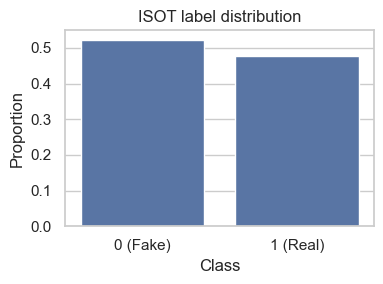

label
0    0.522985
1    0.477015
Name: proportion, dtype: float64


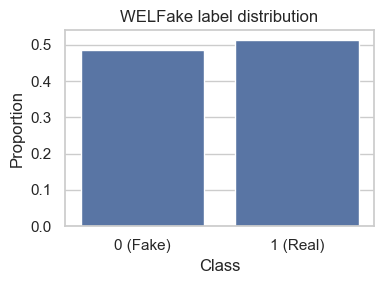

label
0    0.485596
1    0.514404
Name: proportion, dtype: float64


In [7]:
def plot_label_dist(df, name):
    counts = df["label"].value_counts(normalize=True).sort_index()

    plt.figure(figsize=(4,3))
    sns.barplot(x=counts.index, y=counts.values)

    plt.xticks(
        ticks=[0, 1],
        labels=["0 (Fake)", "1 (Real)"]
    )

    plt.title(f"{name} label distribution")
    plt.xlabel("Class")
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.show()

    print(counts)


plot_label_dist(isot, "ISOT")
plot_label_dist(welfake, "WELFake")


In [8]:
def missing_report(df, name):
    print(f"\n{name}")
    print("Empty title:", (df["title"].str.strip() == "").sum())
    print("Empty text:", (df["text"].str.strip() == "").sum())

missing_report(isot, "ISOT")
missing_report(welfake, "WELFake")



ISOT
Empty title: 0
Empty text: 631

WELFake
Empty title: 558
Empty text: 783


In [12]:
import numpy as np

def drop_empty_title_text(df, name):
    before = len(df)

    # Ensure string type
    df["title"] = df["title"].astype(str)
    df["text"] = df["text"].astype(str)

    # Strip whitespace
    df["title"] = df["title"].str.strip()
    df["text"] = df["text"].str.strip()

    # Replace empty strings with NaN
    df["title"].replace("", np.nan, inplace=True)
    df["text"].replace("", np.nan, inplace=True)

    # Drop rows with missing title OR text
    df = df.dropna(subset=["title", "text"]).reset_index(drop=True)

    after = len(df)
    print(f"{name}: dropped {before - after} rows")
    return df
    
isot = drop_empty_title_text(isot, "ISOT")
welfake = drop_empty_title_text(welfake, "WELFake")

ISOT: dropped 0 rows
WELFake: dropped 558 rows


/var/folders/k0/37vrdxwn2lndvck9z7vy1qwh0000gn/T/ipykernel_14537/846485717.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["title"].replace("", np.nan, inplace=True)
/var/folders/k0/37vrdxwn2lndvck9z7vy1qwh0000gn/T/ipykernel_14537/846485717.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [13]:
def missing_report(df, name):
    print(f"\n{name}")
    print("Empty title:", (df["title"].str.strip() == "").sum())
    print("Empty text:", (df["text"].str.strip() == "").sum())

missing_report(isot, "ISOT")
missing_report(welfake, "WELFake")


ISOT
Empty title: 0
Empty text: 0

WELFake
Empty title: 0
Empty text: 0


In [14]:
def duplicate_report(df, name):
    print(f"\n{name}")
    print("Duplicate text:", df.duplicated(subset=["text"]).sum())
    print("Duplicate title+text:", df.duplicated(subset=["title", "text"]).sum())

duplicate_report(isot, "ISOT")
duplicate_report(welfake, "WELFake")



ISOT
Duplicate text: 5628
Duplicate title+text: 5611

WELFake
Duplicate text: 8607
Duplicate title+text: 8203


In [15]:
def drop_duplicates(df, name):
    before = len(df)
    df = df.drop_duplicates(subset=["title", "text"])
    after = len(df)
    print(f"{name}: removed {before - after} duplicates")
    return df

isot = drop_duplicates(isot, "ISOT")
welfake = drop_duplicates(welfake, "WELFake")


ISOT: removed 5611 duplicates
WELFake: removed 8203 duplicates


In [16]:
def add_lengths(df):
    df = df.copy()
    df["text_char_len"] = df["text"].str.len()
    df["text_word_len"] = df["text"].str.split().str.len()
    return df

isot = add_lengths(isot)
welfake = add_lengths(welfake)

display(isot[["text_char_len", "text_word_len"]].describe(percentiles=[.9, .95, .99]))
display(welfake[["text_char_len", "text_word_len"]].describe(percentiles=[.9, .95, .99]))


,text_char_len,text_word_len
count,38656.000000,38656.000000
mean,2455.066380,403.103037
std,1936.353752,313.792844
min,5.000000,1.000000
50%,2226.000000,369.000000
90%,4472.000000,734.000000
95%,5414.250000,880.000000
99%,8054.450000,1313.000000
max,51793.000000,8135.000000


,text_char_len,text_word_len
count,62590.000000,62590.000000
mean,3330.274629,551.264355
std,3643.639481,611.750119
min,3.000000,1.000000
50%,2485.500000,406.000000
90%,6695.000000,1110.000000
95%,8442.000000,1408.000000
99%,15964.440000,2695.110000
max,142961.000000,24234.000000


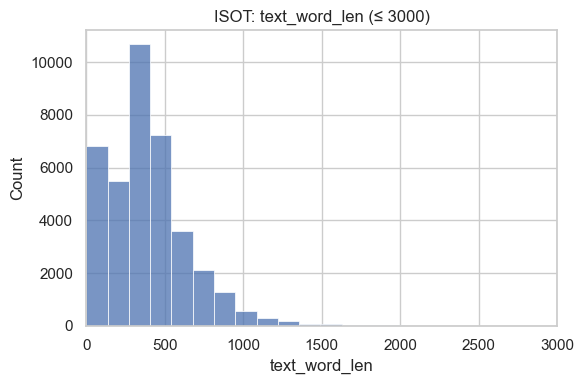

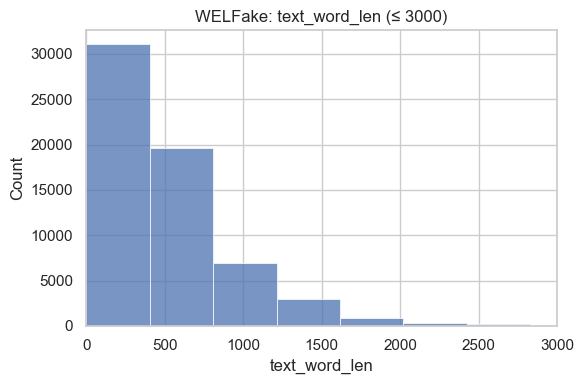

In [28]:
def plot_length(df, col, name, max_len=3000):
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=60)
    plt.xlim(0, max_len)
    plt.title(f"{name}: {col} (≤ {max_len})")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

plot_length(isot, "text_word_len", "ISOT")
plot_length(welfake, "text_word_len", "WELFake")

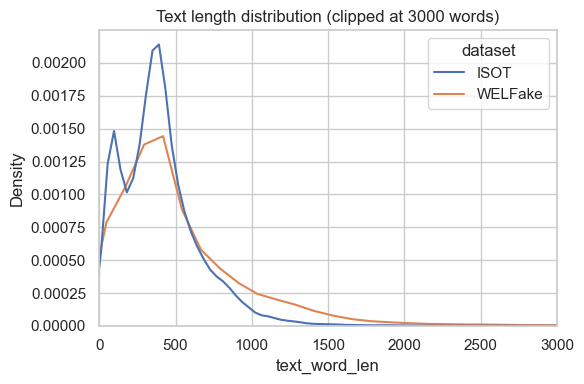

In [32]:
combined_len = pd.concat([
    isot[["dataset", "text_word_len"]],
    welfake[["dataset", "text_word_len"]]
])

plt.figure(figsize=(6,4))
sns.kdeplot(
    data=combined_len,
    x="text_word_len",
    hue="dataset",
    common_norm=False
)
plt.xlim(0, 3000)
plt.title("Text length distribution (clipped at 3000 words)")
plt.tight_layout()
plt.show()


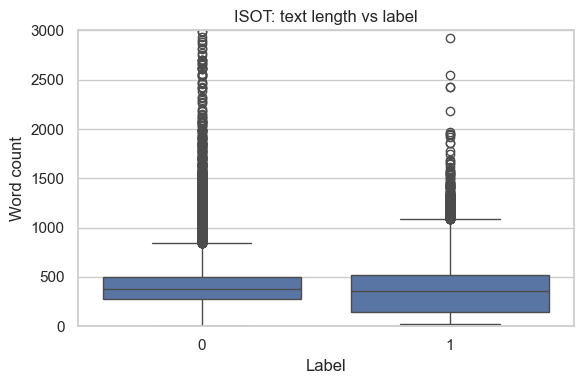

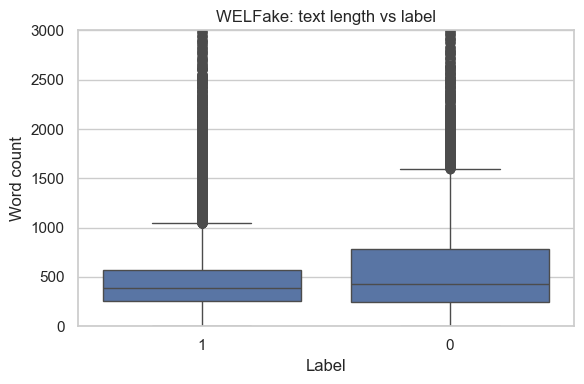

In [33]:
def label_length_box(df, name):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df["label"].astype(str), y=df["text_word_len"])
    plt.ylim(0, 3000)
    plt.title(f"{name}: text length vs label")
    plt.xlabel("Label")
    plt.ylabel("Word count")
    plt.tight_layout()
    plt.show()

label_length_box(isot, "ISOT")
label_length_box(welfake, "WELFake")


In [34]:
all_data = pd.concat([isot, welfake], ignore_index=True)

print("Final combined shape:", all_data.shape)
print(all_data["dataset"].value_counts())

display(all_data.sample(5))


Final combined shape: (101246, 6)
dataset
WELFake    62590
ISOT       38656
Name: count, dtype: int64


,title,text,label,dataset,text_char_len,text_word_len
56846,"Tillerson urges Iraq, Kurds to resolve conflict through dialogue",BAGHDAD (Reuters) - U.S. Secretary of State Rex Tillerson urged the Iraqi government and the Kurdistan region on Monday to resolve their conflict over Kurdish self-determination and disputed terri...,0,WELFake,3438,557
69249,Democrats sue Trump for alleged voter intimidation in four states,"WASHINGTON (Reuters) - Democratic Party officials sued Republican presidential candidate Donald Trump in four battleground states on Monday, seeking to shut down a poll-watching effort they said w...",0,WELFake,3283,517
73444,Unskewing Facebook will take all kinds: Column,"Shortages of women, minorities and conservatives are shaping digital content in ways you can't see.\n\nWe’ve learned a lot this month about how Facebook picks its trending topics: A team of curato...",0,WELFake,4817,760
7573,"Factbox: Trump meets with AT&T CEO, others",(Reuters) - U.S. President-elect Donald Trump held meetings in New York on Thursday as he prepared to take over the White House from President Barack Obama on Jan. 20. The following is a list of c...,1,ISOT,864,136
88774,Obama trade bill in trouble,"“We obviously spoke about my passion and his passion, which [is] veterans and veterans issues,” he said.",0,WELFake,104,17


In [35]:
isot.to_csv("isot_clean.csv", index=False)
welfake.to_csv("welfake_clean.csv", index=False)
all_data.to_csv("news_clean.csv", index=False)

print("Saved isot_clean.csv, welfake_clean.csv, news_clean.csv")

Saved isot_clean.csv, welfake_clean.csv, news_clean.csv


In [36]:
combined = all_data

In [37]:
combined

,title,text,label,dataset,text_char_len,text_word_len
0,"BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. Testimony","Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all o...",0,ISOT,2114,361
1,Failed GOP Candidates Remembered In Hilarious Mocking Eulogies (VIDEO),"Now that Donald Trump is the presumptive GOP nominee, it s time to remember all those other candidates who tried so hard to beat him in the race to the White House. After all, how can we forget al...",0,ISOT,2823,495
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY Trolling Him For Being A Homophobic Bigot,"Mike Pence is a huge homophobe. He supports ex-gay conversion therapy, opposes hate crimes protections for LGBTQ people, is staunchly against marriage equality, and once said that he believes that...",0,ISOT,2402,379
3,California AG pledges to defend birth control insurance coverage,SAN FRANCISCO (Reuters) - California Attorney General Xavier Becerra said on Friday he was “prepared to take whatever action it takes” to defend the Obamacare mandate that health insurers provide ...,1,ISOT,627,88
4,AZ RANCHERS Living On US-Mexico Border Destroy Nancy Pelosi’s Claim About Trump Being “Weak” For Wanting Border Wall [VIDEO],Twisted reasoning is all that comes from Pelosi these days especially when in 2006 most prominent Democrats voted to build a barrier at the border.Fred Davis and John Ladd are two Arizona ranchers...,0,ISOT,792,138
...,...,...,...,...,...,...
101241,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS Used For Lavish Wedding Of “Spoiled Brat” Chelsea Clinton,An email released by WikiLeaks on Sunday appears to show a former top aide to Bill Clinton arguing that an investigation into Clinton Foundation spending would show that Chelsea Clinton used found...,1,WELFake,1237,205
101242,Russians steal research on Trump in hack of U.S. Democratic Party,"WASHINGTON (Reuters) - Hackers believed to be working for the Russian government broke into the Democratic National Committee’s computer network, spied on internal communications and accessed rese...",0,WELFake,4787,735
101243,WATCH: Giuliani Demands That Democrats Apologize For Trump’s Racist Birtherism,"You know, because in fantasyland Republicans never questioned the citizenship of America s first black president.But that s exactly what they did for years and Donald Trump led the charge by going...",1,WELFake,3634,604
101244,Migrants Refuse To Leave Train At Refugee Camp In Hungary,"Migrants Refuse To Leave Train At Refugee Camp In Hungary\n\nThousands of migrants flooded into a train station in the Hungarian capital Thursday after police lifted a two-day blockade, but some w...",0,WELFake,2864,477


In [55]:
combined['title'] = combined['title'].fillna("")
combined['text'] = combined['text'].fillna("")

combined['full_text'] = (combined['title'] + " " + combined['text']).str.strip()

display(combined[['dataset', 'title', 'text', 'full_text']].head())


,dataset,title,text,full_text
0,ISOT,"BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. Testimony","Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all o...","BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. Testimony Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the ho..."
1,ISOT,Failed GOP Candidates Remembered In Hilarious Mocking Eulogies (VIDEO),"Now that Donald Trump is the presumptive GOP nominee, it s time to remember all those other candidates who tried so hard to beat him in the race to the White House. After all, how can we forget al...","Failed GOP Candidates Remembered In Hilarious Mocking Eulogies (VIDEO) Now that Donald Trump is the presumptive GOP nominee, it s time to remember all those other candidates who tried so hard to b..."
2,ISOT,Mike Pence’s New DC Neighbors Are HILARIOUSLY Trolling Him For Being A Homophobic Bigot,"Mike Pence is a huge homophobe. He supports ex-gay conversion therapy, opposes hate crimes protections for LGBTQ people, is staunchly against marriage equality, and once said that he believes that...","Mike Pence’s New DC Neighbors Are HILARIOUSLY Trolling Him For Being A Homophobic Bigot Mike Pence is a huge homophobe. He supports ex-gay conversion therapy, opposes hate crimes protections for L..."
3,ISOT,California AG pledges to defend birth control insurance coverage,SAN FRANCISCO (Reuters) - California Attorney General Xavier Becerra said on Friday he was “prepared to take whatever action it takes” to defend the Obamacare mandate that health insurers provide ...,California AG pledges to defend birth control insurance coverage SAN FRANCISCO (Reuters) - California Attorney General Xavier Becerra said on Friday he was “prepared to take whatever action it tak...
4,ISOT,AZ RANCHERS Living On US-Mexico Border Destroy Nancy Pelosi’s Claim About Trump Being “Weak” For Wanting Border Wall [VIDEO],Twisted reasoning is all that comes from Pelosi these days especially when in 2006 most prominent Democrats voted to build a barrier at the border.Fred Davis and John Ladd are two Arizona ranchers...,AZ RANCHERS Living On US-Mexico Border Destroy Nancy Pelosi’s Claim About Trump Being “Weak” For Wanting Border Wall [VIDEO] Twisted reasoning is all that comes from Pelosi these days especially w...


In [40]:
# Simple token length by whitespace; this is for EDA, not exact transformer token counts
combined['char_len'] = combined['full_text'].str.len()
combined['word_len'] = combined['full_text'].str.split().str.len()

print("Character length stats:")
display(combined['char_len'].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

print("\nWord length stats:")
display(combined['word_len'].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))


Character length stats:


count    101246.000000
mean       3072.601140
std        3133.795864
min          18.000000
50%        2450.000000
90%        5833.000000
95%        7580.000000
99%       13745.550000
max      143035.000000
Name: char_len, dtype: float64


Word length stats:


count    101246.000000
mean        506.648628
std         523.833637
min           2.000000
50%         403.000000
90%         962.000000
95%        1261.000000
99%        2281.550000
max       24243.000000
Name: word_len, dtype: float64

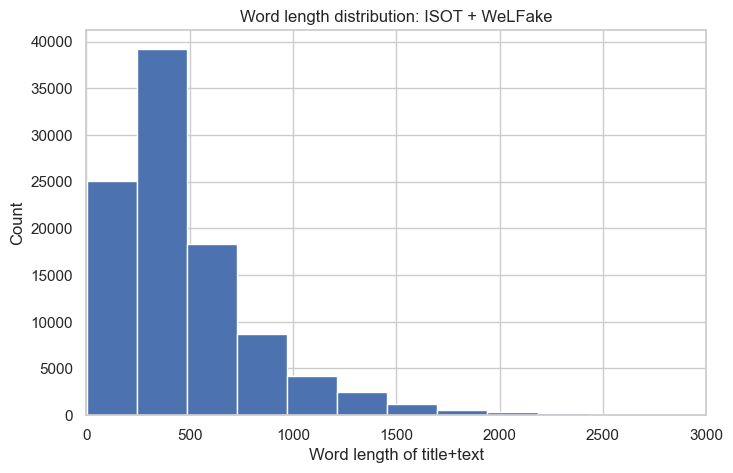

In [53]:
#Overall distribution:
fig, ax = plt.subplots(figsize=(8, 5))
combined['word_len'].hist(bins=100, ax=ax)
ax.set_xlabel("Word length of title+text")
ax.set_ylabel("Count")
ax.set_title("Word length distribution: ISOT + WeLFake")
plt.xlim(0, 3000)
plt.show()


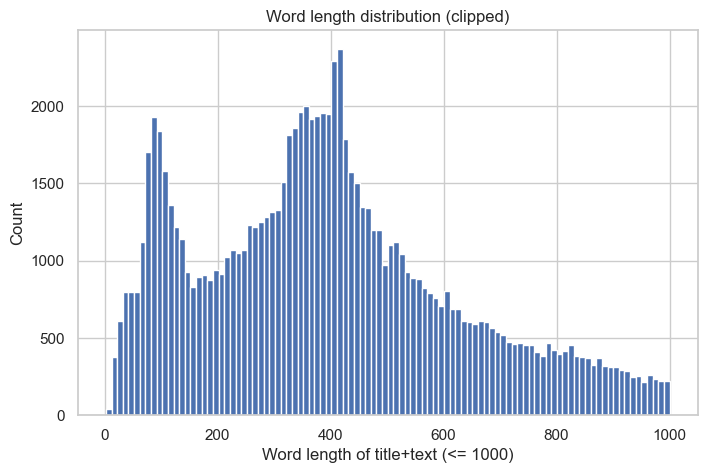

In [43]:
#Zoomed in on the typical range (e.g. up to 1000 words):
fig, ax = plt.subplots(figsize=(8, 5))
combined[combined['word_len'] <= 1000]['word_len'].hist(bins=100, ax=ax)
ax.set_xlabel("Word length of title+text (<= 1000)")
ax.set_ylabel("Count")
ax.set_title("Word length distribution (clipped)")
plt.show()


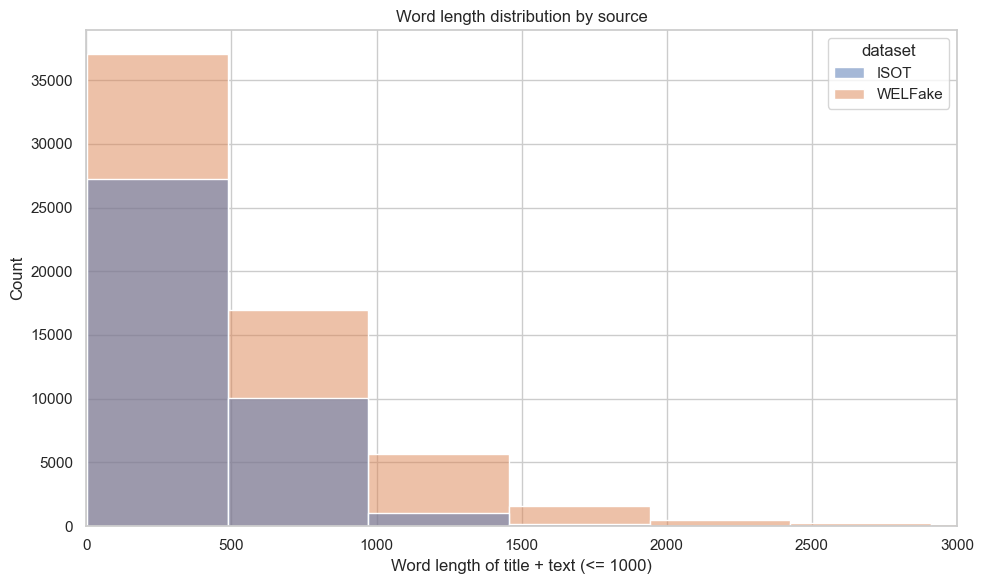

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=combined,
    x="word_len",
    hue="dataset",
    bins=50,
    kde=False,
    multiple="layer"
)
plt.xlabel("Word length of title + text (<= 1000)")
plt.ylabel("Count")
plt.title("Word length distribution by source")
plt.xlim(0, 3000)
plt.tight_layout()
plt.show()
